In [1]:
# Disable warnings in Anaconda
import warnings

import numpy as np
from scipy.interpolate import interp1d

warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import glob
import random

In [2]:
n_train = 100
n_test = 779
noise = 0.1

# Generate data
def generate(n_samples):

    # ts = np.genfromtxt("data/csv_Shower/cluster_0/5.csv", delimiter=" ")
    # ts = np.genfromtxt("data/bucket.csv", delimiter=" ")
    ts = np.genfromtxt("data/oneday_kitchen.csv", delimiter=" ")

    start_time = ts[0,0]
    ts[:,0] -= start_time
    print(len(ts), n_samples)
    X = random.sample(range(0, len(ts)), n_samples)
    X.sort()

    y = ts[X,1]
    X = np.reshape(X, (n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train)
X_test, y_test = generate(n_samples=n_test)

779 100
779 779


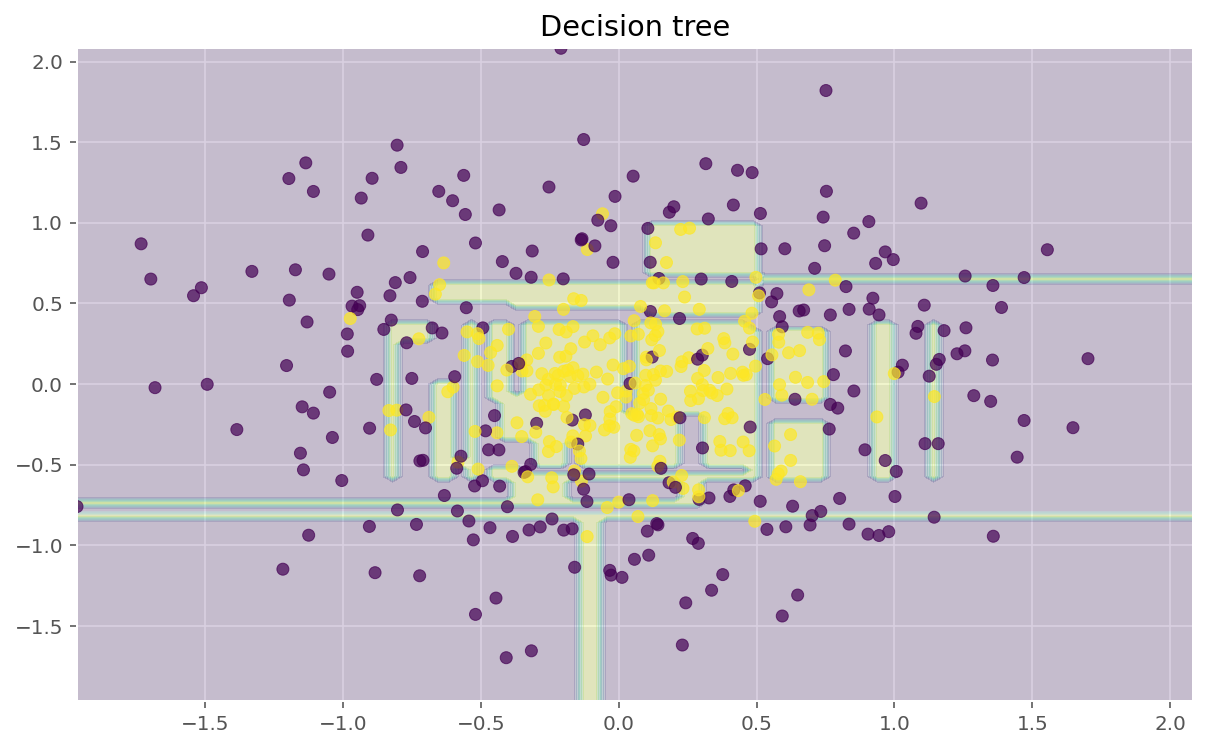

In [7]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)

X_train_circles, X_test_circles, y_train_circles, y_test_circles = \
    train_test_split(X, y, test_size=0.2)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

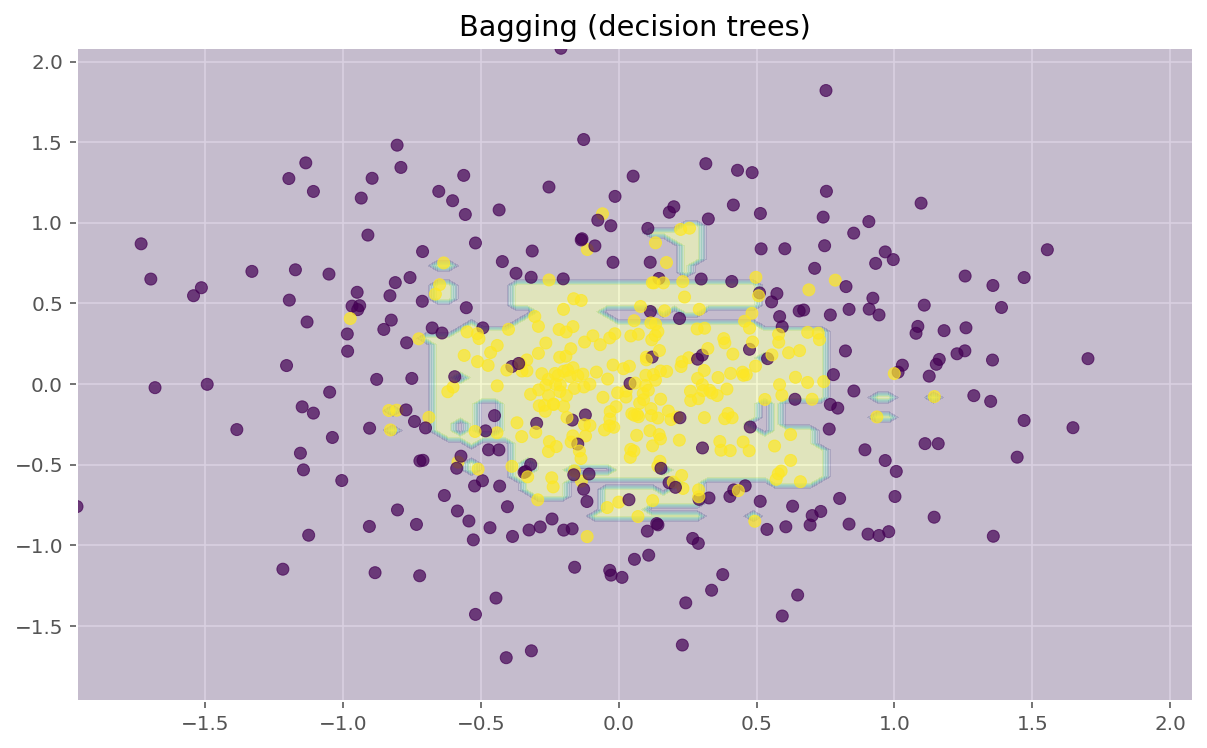

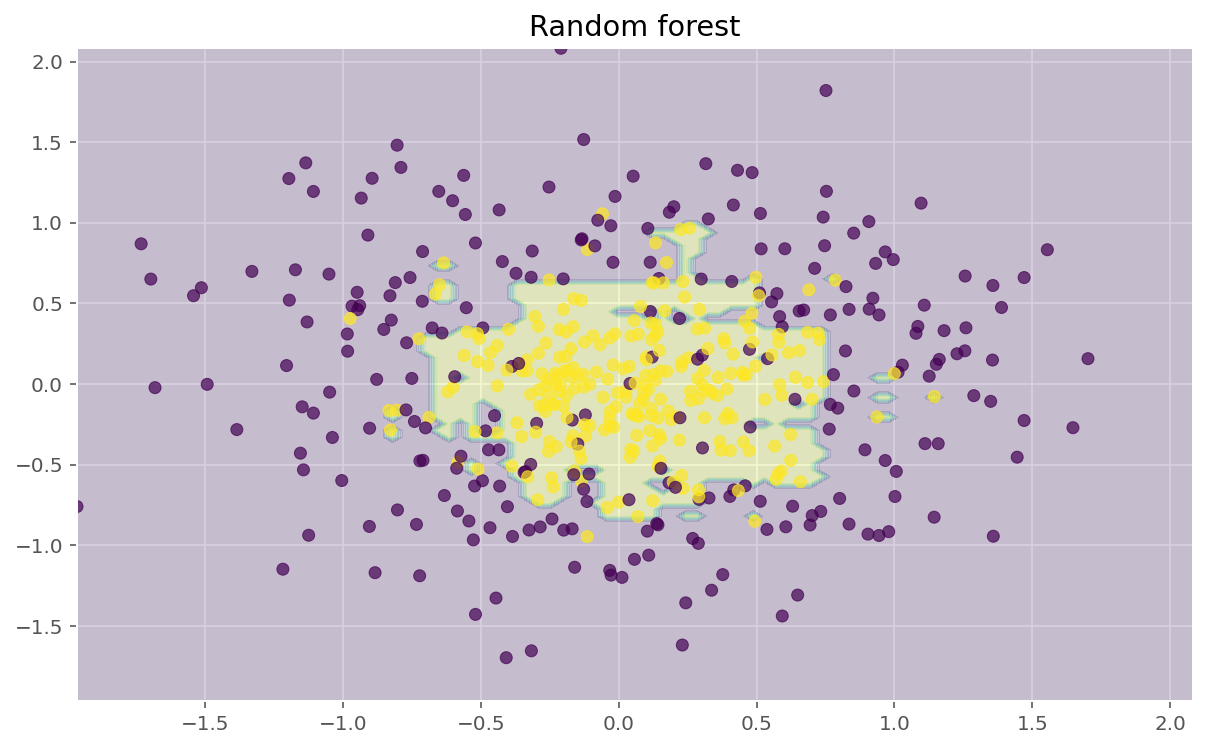

In [4]:
b_dtree = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Bagging (decision trees)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()